## 1.Общий анализ АБ Теста:

In [1]:
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import mannwhitneyu
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#1
Test = pd.read_csv('Dataset_AB_TEST.csv', delimiter=';')

In [3]:
#2
Test1=Test.dropna()

In [4]:
Test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


In [5]:
Test1.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [7]:
def statistical_analysis(r,q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if (isinstance(r,tuple) == True) or (isinstance(r, list) == True): #проверка типа данных на входе
        if len(r) <= 4:
            return ('Требуется более длинный ряд')
        else:
            r=r
    else: 
        return ('Нужен список или кортеж!')
    r_series = pd.Series(r) #перевод в тип данных серия Pandas
    
    r_mean = r_series.mean()
    r_var = r_series.var()
    r_std = round(r_series.std(),2)
    
    print("Среднее = ",r_mean)
    print("Дисперсия = ",r_var)
    print("Стандартное отклонение = ", r_std)
    
    qs = np.quantile(r_series,q)
    for i in range(len(q)):
        if q[i] == 0.25:
            print ('Нижний квартиль:', qs[i])
        elif q[i] == 0.5:
            print ('Медиана:', qs[i])
        elif q[i] == 0.75:
            print ('Верхний квартиль:', qs[i])
        else:
            print('Дециль:', qs[i])
    
    sns.histplot(r)
            
    return r_mean, r_var, r_std, qs

Среднее =  3431.3779388532666
Дисперсия =  6023895.900736336
Стандартное отклонение =  2454.36
Дециль: 409.0
Нижний квартиль: 1237.0
Дециль: 1576.0
Дециль: 2307.0
Медиана: 3155.0
Дециль: 3899.0
Верхний квартиль: 5274.0
Дециль: 7011.0


(3431.3779388532666,
 6023895.900736336,
 2454.36,
 array([ 409., 1237., 1576., 2307., 3155., 3899., 5274., 7011.]))

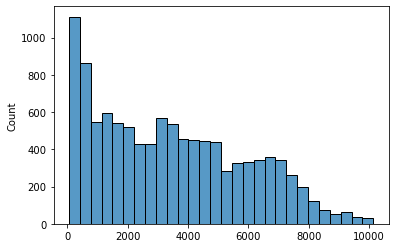

In [8]:
df=Test1.loc[Test1.sum_pay<12000]
statistical_analysis(list(df['sum_pay']))

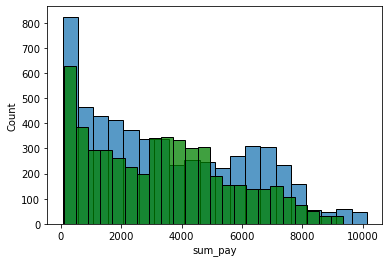

In [9]:
#3 
test=df.loc[Test1.id_group =='test']
test=test['sum_pay']
control=df.loc[Test1.id_group =='control']
control=control['sum_pay']
def show_hist (test,control):
    sns.histplot(data=test) 
    sns.histplot(data=control, color='g')
    plt.show()
show_hist(test,control)

#### Вывод
На визуализации видно, что сумма покупок выше в тестовой группе

In [10]:
#4 
def test_calc (r1,r2,alpha=0.05):
    s,p=ttest_ind(r1,r2)
    if alpha<p:
        print('Гипотеза Н0 о равентстве средних принимается')
    else:
        print('Гипотеза Н0 о равентстве средних отвергается')
    return s,p

In [11]:
def  mann_whitney_func (set1,set2,a=0.05):
    kMW,pMW = mannwhitneyu(set1,set2,alternative='two-sided')
    if pMW>a:
        print('Распределения равны')
    else:print('Распределения не равны')
    return kMW, pMW

In [12]:
mann_whitney_func(test,control)

Распределения равны


(14750609.5, 0.05842125879702285)

#### Вывод
Существенной разницы между контрольной и тестовой группой нет

In [13]:
test_calc(test,control)

Гипотеза Н0 о равентстве средних отвергается


(3.7141912292177888, 0.0002048855494553075)

#### Вывод
Нулевая гипотеза отвергается, что означает, что разница существует

## 2.Анализ по торговым точкам

In [14]:
uniq=df.id_point.unique()

1199.0
Недостаточно значений


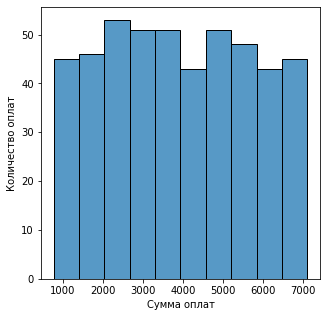

1182.0
Распределения не равны
Гипотеза Н0 о равентстве средних отвергается
14.992145173063193 %


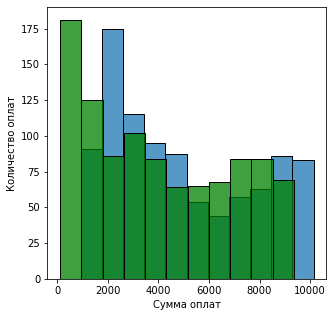

1178.0
Распределения не равны
Гипотеза Н0 о равентстве средних принимается
-3.1671633755590705 %


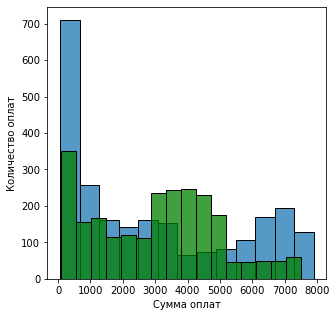

1179.0
Распределения равны
Гипотеза Н0 о равентстве средних принимается
5.622516244684022 %


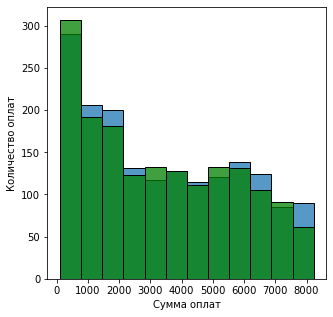

1186.0
Недостаточно значений


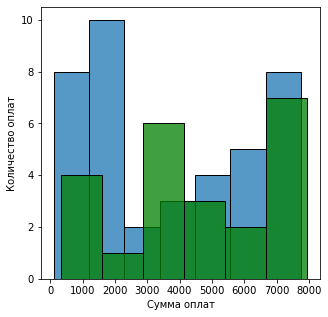

1188.0
Недостаточно значений


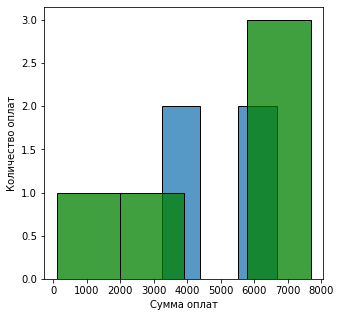

In [23]:
for i in uniq:
    test=df.loc[(Test1.id_group =='test')& (Test1.id_point== i)]
    test=test['sum_pay']
    control=df.loc[(Test1.id_group =='control') & (Test1.id_point== i)]
    control=control['sum_pay']
    
    plt.figure(figsize=(5,5))
    plt.xlabel('Сумма оплат')
    plt.ylabel('Количество оплат')
    
    print(i)
    
    if len(test) <=100 or len(control)<=100:
        print('Недостаточно значений')
    else:
        mann_whitney_func(test,control)
        test_calc(test,control)
        print((test.sum()/control.sum())*100-100,'%') 

        
    show_hist(test,control)

## 3. Сегментация по длительности регистрации
    

In [168]:
def proxi_ranges(set1,set2,a=0.05):
    disp1=np.var(set1)
    disp2=np.var(set2)
    covariance=np.cov(set1,set2)
    print(f'''Дисперсия 1го ряда:{disp1}, дисперсия 2 го ряда:{disp2}, коэффициент ковариации: {covariance}''')
    kPirs,pPirs=pearsonr(set1,set2)
    kSpir,pSpir=spearmanr(set1,set2)
    if pPirs>a:
        print('Корреляция Пирсона для данных равна нулю')
    elif abs(kPirs)<0.3:
        print(f'Коэффициент корреляции Пирсона: {kPirs}. Корреляция слабая')
    elif abs(kPirs)>0.7:
        print(f'Коэффициент корреляции Пирсона: {kPirs}. Корреляция сильная')
    else:
        print(f'Коэффициент корреляции Пирсона: {kPirs}. Корреляция средняя')
        
    if pSpir>a:
        print('Корреляция Спирмана для данных равна нулю')
    elif abs(kSpir)<0.3:
        print(f'Коэффициент корреляции Спирмена: {kSpir}. Корреляция слабая')
    elif abs(kSpir)>0.7:
        print(f'Коэффициент корреляции Спирмена: {kSpir}. Корреляция сильная')
    else:
        print(f'Коэффициент корреляции Спирмена: {kSpir}. Корреляция средняя')

In [169]:
proxi_ranges(df.sum_pay,df.months_reg)

Дисперсия 1го ряда:6023336.11113493, дисперсия 2 го ряда:10.038649533445552, коэффициент ковариации: [[6.02389590e+06 4.65262789e+03]
 [4.65262789e+03 1.00395825e+01]]
Коэффициент корреляции Пирсона: 0.598276252133036. Корреляция средняя
Коэффициент корреляции Спирмена: 0.6520008575703581. Корреляция средняя


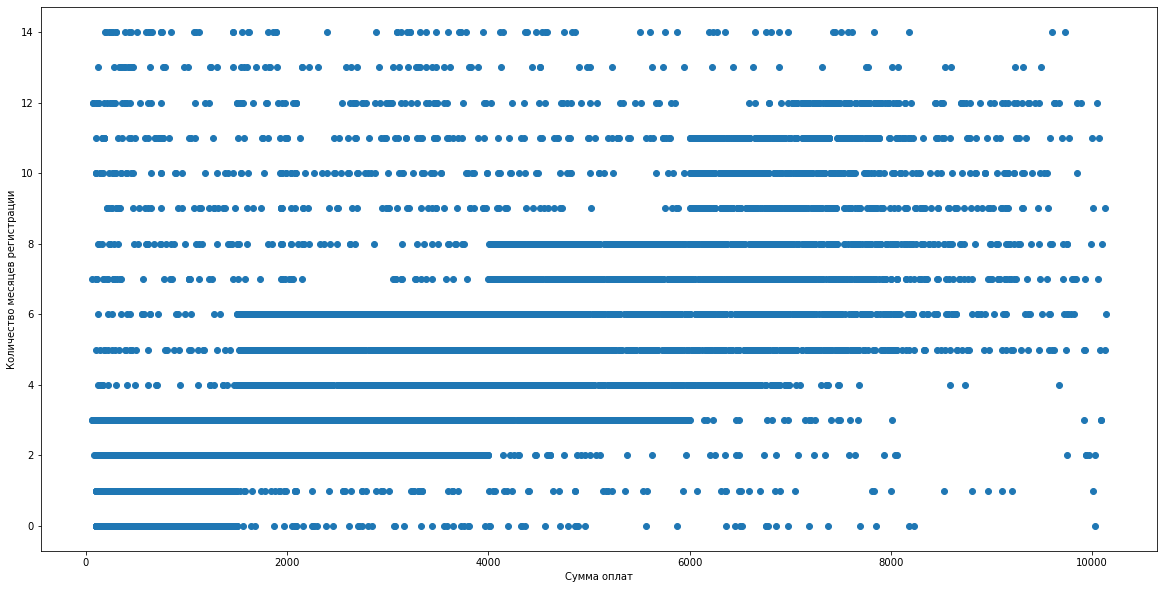

In [175]:
plt.figure(figsize=(20,10))
plt.scatter(df.sum_pay,df.months_reg)
plt.xlabel('Сумма оплат')
plt.ylabel('Количество месяцев регистрации')
plt.show()

#### Вывод
На графике видно, что с ростом времени регистрации, растет сумма оплат